Entropy over words in English:  8.938139929017918
2(a)- Win Rate for words chosen by frequencyy: 0.99069, Entropy:8.93814 
2(b)- Win Rate for words chosen by uniformity: 1.0, Entropy: 15.33954 


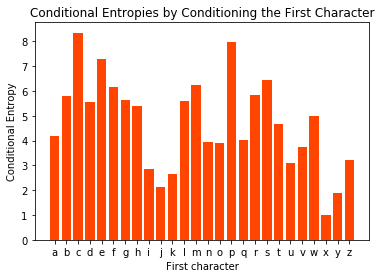

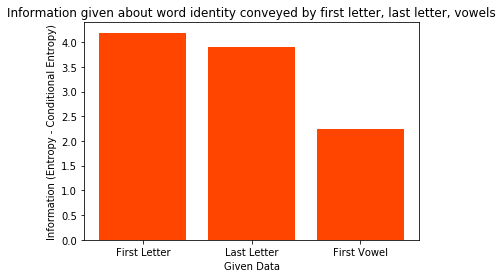

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from math import sqrt, log, exp
import pandas as pd
import string

# dictionary = pd.read_csv("Assignment10-WordFrequencies.csv", header=None)
# dictionary.insert(2, "P(word)", dictionary[1]/word_freq_sum)
# dictionary.to_csv("P_word.csv", index=False)

dictionary = pd.read_csv("P_word.csv", header=None)
word_freq_sum = np.sum(dictionary[1])
vowels = ['a', 'e', 'i', 'o', 'u']
alphabets = list(string.ascii_lowercase) #alphabet letters in list
NUM_WORDS = dictionary.shape[0]

# #Q1
word_prob_list = [float(each) for each in dictionary[2][1:]] #reads each word's probability into a list
entropy = sum([word_p * log(1/word_p, 2) for word_p in word_prob_list])
print("Entropy over words in English: ", entropy)

#Q2
word_prob_code_len_pair = [(word_p, log(1/word_p, 2)) for word_p in word_prob_list] #Creates a pair of word probability and its bits length according to frequency
entropy_by_freq = entropy

uni_prob = 1 / NUM_WORDS
uni_prob_code_len_pair = [(uni_prob, log(1/uni_prob, 2)) for _ in range(NUM_WORDS)] #Creates a pair of word probability and its bits length according to uniform probability
entropy_by_uni = sum([uni_prob * length for uni_prob, length in uni_prob_code_len_pair])

#Computes the win_rate for words guessed for the pair
def win_rate(pair):
    win_p = 0
    for word_p, code_length in pair:
        if code_length <= 20:
            win_p += word_p
    return win_p

print("2(a)- Win Rate for words chosen by frequencyy: {0}, Entropy:{1} ".format(round(win_rate(word_prob_code_len_pair), 5), round(entropy_by_freq, 5)))

print("2(b)- Win Rate for words chosen by uniformity: {0}, Entropy: {1} ".format(round(win_rate(uni_prob_code_len_pair), 5), round(entropy_by_uni, 5)))


#Q3
letter_prob_count, word_count = {each: 0 for each in alphabets}, {each: 0 for each in alphabets}
dictionary[0] = dictionary[0].astype(str)

#Finds frequencies of all the words that start with each character
def first_letter_count():
    for i in range(1, dictionary.shape[0]):
        first_letter = dictionary.iloc[i, 0].lower()[0]
        word_count[first_letter] += dictionary.iloc[i, 1]

#Finds conditional entropy for each character 
def word_prob():
    for alphabet in word_count:
        total = word_count[alphabet]
        for i in range(1, dictionary.shape[0]):
            freq = dictionary.iloc[i, 1]
            first_letter = dictionary.iloc[i, 0].lower()[0]
            prob = freq / total
            if alphabet == first_letter:
                letter_prob_count[alphabet] += prob * log(1/prob, 2)

first_letter_count()
word_prob()
x = letter_prob_count.keys()
y = letter_prob_count.values()

plt.bar(x, y, color='orangered')
plt.xlabel("First character")
plt.ylabel("Conditional Entropy")
plt.title('Conditional Entropies by Conditioning the First Character')

plt.savefig("3.png")
plt.show()


#Q4


letter_prob_count, word_count = {each: 0 for each in alphabets}, {each: 0 for each in alphabets}
dictionary[0] = dictionary[0].astype(str)


# Finds frequencies of all the words that start with each character
def first_letter_count():
    for i in range(1, dictionary.shape[0]):
        first_letter = dictionary.iloc[i, 0].lower()[0]
        word_count[first_letter] += dictionary.iloc[i, 1]


# Finds conditional entropy for each character
def word_prob():
    for alphabet in word_count:
        total = word_count[alphabet]
        for i in range(1, dictionary.shape[0]):
            freq = dictionary.iloc[i, 1]
            first_letter = dictionary.iloc[i, 0].lower()[0]
            prob = freq / total
            if alphabet == first_letter:
                letter_prob_count[alphabet] += prob * log(1 / prob, 2)
        letter_prob_count[alphabet] = total / word_freq_sum * letter_prob_count[alphabet]

first_letter_count()
word_prob()

cond_entropy = letter_prob_count.values()
mutual_first = entropy - sum(cond_entropy)


last_letter_prob_count, last_count, vowel_prob_count, vowel_count = {each: 0 for each in alphabets}, {each: 0 for each in alphabets}, {
each: 0 for each in vowels}, {each: 0 for each in vowels}
dictionary[0] = dictionary[0].astype(str)


# Finds frequencies of all the words that start with each character
def last_letter_count():
    for i in range(1, dictionary.shape[0]):
        last_letter = dictionary.iloc[i, 0].lower()[-1]
        last_count[last_letter] += dictionary.iloc[i, 1]


# Finds conditional entropy for each last character
def last_letter_prob():
    for alphabet in last_count:
        total = last_count[alphabet]
        for i in range(1, dictionary.shape[0]):
            freq = dictionary.iloc[i, 1]
            last_letter = dictionary.iloc[i, 0].lower()[-1]
            prob = freq / total
            if alphabet == last_letter:
                last_letter_prob_count[alphabet] += prob * log(1 / prob, 2)
        last_letter_prob_count[alphabet] = total / word_freq_sum * last_letter_prob_count[alphabet]


last_letter_count()
last_letter_prob()

cond_entropy = last_letter_prob_count.values()
mutual_last = entropy - sum(cond_entropy)

def vowel_letter_count():
    for i in range(1, dictionary.shape[0]):
        word = dictionary.iloc[i, 0].lower()
        index = 0
        while index < len(word):
            if word[index] in vowels:
                vowel_count[word[index]] += dictionary.iloc[i, 1]
                break
            index += 1


# Finds conditional entropy for each first vowel
def vowel_letter_prob():
    global vowel_prob_count
    for i in range(1, dictionary.shape[0]):
        freq = dictionary.iloc[i, 1]
        word = dictionary.iloc[i, 0]
        index = 0
        while index < len(word):
            if word[index] in vowels:
                total = vowel_count[word[index]]
                prob = freq / total
                vowel_prob_count[word[index]] += prob * log(1/prob, 2)
                break
            index += 1
    vowel_prob_count = {vowel:vowel_count[vowel]/sum(vowel_count.values()) * vowel_prob_count[vowel] for vowel in vowel_prob_count}


vowel_letter_count()
vowel_letter_prob()

cond_entropy = vowel_prob_count.values()
mutual_vowel = entropy - sum(cond_entropy)

x = ['First Letter', 'Last Letter', 'First Vowel']
y = [mutual_first, mutual_last, mutual_vowel]

plt.bar(x, y, color='orangered')
plt.xlabel("Given Data")
plt.ylabel("Information (Entropy - Conditional Entropy)")
plt.title('Information given about word identity conveyed by first letter, last letter, vowels')

plt.savefig("4c.png")
plt.show()


# # Q5
# length_dict = {}
# dictionary[0] = dictionary[0].astype(str)
# def letter_length_count():
#     for i in range(1, dictionary.shape[0]):
#         word_length = str(len(dictionary.iloc[i, 0]))
#         if word_length in length_dict:
#             length_dict[word_length] += dictionary.iloc[i, 1]
#         else:
#             length_dict[word_length] = dictionary.iloc[i, 1]

# letter_length_count()
# sorted_len_dict = {length: length_dict[length] for length in sorted(length_dict, key=lambda x:int(x))} #Sorts the length_dict in increasing length and creates new dictionary of it
# length_prob = {key: 0 for key in sorted_len_dict.keys()}


# unique_word_count = {each:0 for each in sorted_len_dict.keys()}

# def length_letter_prob():
#     for i in range(1, dictionary.shape[0]):
#         length = len(dictionary.iloc[i, 0])
#         total = word_freq_sum
#         freq = dictionary.iloc[i, 1]
#         prob = freq / total
#         length_prob[str(length)] += log(1/prob, 2)
#         unique_word_count[str(length)] += 1

# length_letter_prob()
# length_prob = {length: length_prob[length] / sorted_len_dict[length] for length in length_prob}

# x = [int(length) for length in length_prob.keys()]
# y = length_prob.values()

# plt.bar(x, y, color='orangered')
# plt.xlabel("Word Length")
# plt.ylabel("Average surprisal")
# plt.title('Average Surprisal based on the word length')

# plt.savefig("5.png")
# plt.show()

# # Q6
# MEASURE_CONST = sum([y/x for y, x in list(zip(y, x))]) / len(x) #This is a measure constant that evaluates how well the avg surprisal agrees with the word length. How I find the measure is by finding the ratio between avg surprisal & number of word length for each possible length found in #5 and then finding their average, so that this gives a correlation constant for average surprisal and word length. I will do the same for N=10, N=20, N=30... and divide each measure by this constant to find the measure. If it is greater than 1, that means it has higher measure, which can be interpreted as having stronger agreement between average surprisal and word length.

# dictionary[0] = dictionary[0].astype(str)
# variance_list = []

# def surprisal_finder():
#     N = 10
#     N_MAX = 6000

#     while N <= N_MAX:
#         length_dict = {}

#         for i in range(1, N):
#             word_length = str(len(dictionary.iloc[i, 0]))
#             if word_length in length_dict:
#                 length_dict[word_length] += dictionary.iloc[i, 1]
#             else:
#                 length_dict[word_length] = dictionary.iloc[i, 1]

#         sorted_len_dict = {length: length_dict[length] for length in sorted(length_dict, key=lambda x: int(x))}
#         length_prob = {key: 0 for key in sorted_len_dict.keys()}
#         unique_word_count = {each: 0 for each in sorted_len_dict.keys()}

#         for i in range(1, N):
#             length = len(dictionary.iloc[i, 0])
#             total = word_freq_sum
#             freq = dictionary.iloc[i, 1]
#             prob = freq / total
#             length_prob[str(length)] += log(1 / prob, 2)
#             unique_word_count[str(length)] += 1

#         length_prob = {length: length_prob[length] / unique_word_count[length] for length in length_prob}
#         x = [int(length) for length in length_prob.keys()]
#         y = length_prob.values()
#         measured_const_val = sum([y / x for y, x in list(zip(y, x))]) / len(x)
#         variance_list.append(measured_const_val/MEASURE_CONST)
#         N += 10
#         print(N)

# surprisal_finder()

# x = [10 * i for i in range(1, len(variance_list)+1)]
# y = variance_list

# plt.plot(x, y, color='orangered')
# plt.xlabel("N (Most frequent N words)")
# plt.ylabel("Surprisal Variance(measured avg ratio / measure const")
# plt.title('Correlation between number of most frequent words and agreement of surprisal (y >= 1.0 : strong / y <= 1.0: weak')

# plt.savefig("6.png")
# plt.show()